# Florencia: Regresion Lineal Simple

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [251]:
# Carga de datos
data = pd.read_csv('listings - Florencia_clean.csv')
data.head()

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,31840,380378,previous scrape,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",S/D,Officina 360,2011-02-07,"Florence, Italy",360 Rentals has been offering fully furnished ...,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,32120,99235,city scrape,Welcome at Corte Verde in Florence,Apartment at a 30 minute walk from Ponte Vecch...,S/D,Lucia,2010-03-26,"Florence, Italy",I was born and raised in the beautiful Florenc...,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,32180,13925330,city scrape,Charming Gem - Oltrarno City centre,.,S/D,Cesare,2014-04-05,"Florence, Italy",.,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,39115,167739,city scrape,Central Double Shared Bathroom,Double (or Twin) Room Shared Bathroom: comfort...,"San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,39165,167739,previous scrape,Florence Central Double Private Bathroom,"Double room private bathroom: comfortable, lar...","San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13


### Tratamiento de los Datos

In [252]:
# ---------------------------------------------------------------------------------
# 1) Filtrar y transformar la variable "host_acceptance_rate"
#    - Primero eliminamos las filas donde "host_acceptance_rate" sea "S/D"
#    - Después, removemos el carácter "%" y convertimos la columna a tipo float
# ---------------------------------------------------------------------------------
data = data[data['host_acceptance_rate'] != 'S/D']
data['host_acceptance_rate'] = (
    data['host_acceptance_rate']
    .str.replace('%', '')
    .astype(float)
)
# ---------------------------------------------------------------------------------
# 2) Convertir la variable "host_is_superhost" a valores numéricos
#    - Sustituimos la 't' por 1 y la 'f' por 0
#    - Con astype(int), confirmamos el tipo de dato numérico entero
# ---------------------------------------------------------------------------------
data['host_is_superhost'] = (
    data['host_is_superhost']
    .replace({'t': 1, 'f': 0})
    .astype(int)
)
# ---------------------------------------------------------------------------------
# 3) Crear la columna "bathrooms" a partir de "bathrooms_text"
#    - Extraemos únicamente el número que aparece en "bathrooms_text" (puede ser decimal)
#    - Convertimos esos valores a float
#    - Eliminamos las filas que tengan valores nulos en "bathrooms" para evitar problemas
# ---------------------------------------------------------------------------------
data['bathrooms'] = (
    data['bathrooms_text']
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)
data = data[data['bathrooms'].notnull()]

# ---------------------------------------------------------------------------------
# 4) Convertir "instant_bookable" a valores numéricos
#    - De la misma forma que con "host_is_superhost": 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
data['instant_bookable'] = (
    data['instant_bookable']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita para evitar FutureWarning
)

# ---------------------------------------------------------------------------------
# 5) Convertir "host_identity_verified" a valores numéricos
#    - Misma lógica: 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
data['host_identity_verified'] = (
    data['host_identity_verified']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita
)

# ---------------------------------------------------------------------------------
# 6) Convertir la columna "property_type" a valores numéricos
#    - Cada tipo de propiedad se asocia con un código entero según el diccionario "types"
# ---------------------------------------------------------------------------------
types = {
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Private room in bed and breakfast': 4,
    'Entire home': 5,
    'Private room in condo': 6,
    'Entire loft': 7,
    'Room in boutique hotel': 8
}
data['bedrooms'] = data['bedrooms'].round()
data['bedrooms'] = data['bedrooms'].astype(int)
data['bedrooms'].to_csv('bedrooms.csv', index=False)
data['property_type'] = data['property_type'].replace(types)



/tmp/ipykernel_1194549/3133094367.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_1194549/3133094367.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_1194549/3133094367.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [253]:
# -------------------------------------------------------------------------
# 1) Crear dataframes separados según el tipo de habitación ('room_type')
#    - Se filtra el dataframe original (cd) según los valores de la columna room_type.
# -------------------------------------------------------------------------
cd_entire = data[data['room_type'] == 'Entire home/apt']   # Alojamientos completos
cd_private = data[data['room_type'] == 'Private room']     # Habitaciones privadas
cd_shared = data[data['room_type'] == 'Shared room']       # Habitaciones compartidas
cd_hotel = data[data['room_type'] == 'Hotel room']         # Habitaciones de hotel

# -------------------------------------------------------------------------
# 2) Mostrar la frecuencia de cada tipo de habitación en cada subset
#    - Utilizamos 'value_counts()' para contar cuántas filas hay de cada tipo.
#    - El argumento 'end="\n\n"' agrega un salto de línea extra entre cada impresión.
# -------------------------------------------------------------------------
print(cd_entire['room_type'].value_counts(), end='\n\n')
print(cd_private['room_type'].value_counts(), end='\n\n')
print(cd_shared['room_type'].value_counts(), end='\n\n')
print(cd_hotel['room_type'].value_counts(), end='\n\n')


room_type
Entire home/apt    10146
Name: count, dtype: int64

room_type
Private room    1850
Name: count, dtype: int64

room_type
Shared room    34
Name: count, dtype: int64

room_type
Hotel room    81
Name: count, dtype: int64



### x = host_acceptance_rate, y = price

#### entire home/apt

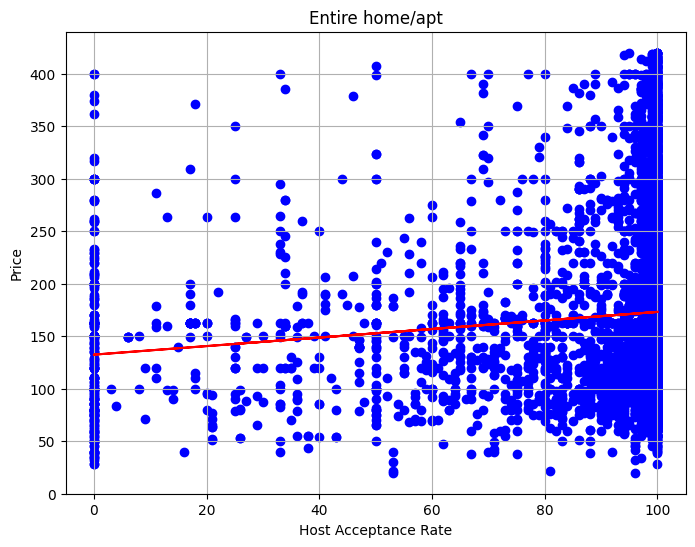

In [254]:
# ---------------------------------------------------------------------------------
# 1) Crear y ajustar un modelo de regresión lineal
#    - Usamos 'host_acceptance_rate' como variable independiente (X).
#    - Definimos 'price' como variable dependiente (y).
# ---------------------------------------------------------------------------------
model = LinearRegression()
model.fit(cd_entire[['host_acceptance_rate']], cd_entire['price'])

# ---------------------------------------------------------------------------------
# 2) Visualizar la regresión lineal
#    - Generamos un diagrama de dispersión (scatter plot) con los datos reales.
#    - Sobre la misma gráfica, dibujamos la línea de mejor ajuste que produce el modelo.
# ---------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.scatter(cd_entire[['host_acceptance_rate']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['host_acceptance_rate']],
    model.predict(cd_entire[['host_acceptance_rate']]),
    color='red'
)
plt.title('Entire home/apt')         # Título de la gráfica
plt.xlabel('Host Acceptance Rate')   # Etiqueta del eje X
plt.ylabel('Price')                  # Etiqueta del eje Y
plt.grid(True)                       # Muestra una cuadrícula para facilitar la lectura
plt.show()                           # Muestra la gráfica


In [255]:
# ---------------------------------------------------------------------------------
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
#    - model.coef_: array con la(s) pendiente(s) de la(s) variable(s) independiente(s).
#    - model.intercept_: valor del intercepto (b) en la regresión lineal.
# ---------------------------------------------------------------------------------
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# ---------------------------------------------------------------------------------
# 2) Representar el modelo lineal de forma explícita
#    - Mostramos la ecuación en el formato y = m*x + b.
# ---------------------------------------------------------------------------------
print(f'y = {m[0]}x + {b}', end='\n\n')

# ---------------------------------------------------------------------------------
# 3) Evaluar el modelo con un indicador de desempeño
#    - Utilizamos model.score() para obtener el R^2, que mide qué tan bien el modelo
#      se ajusta a los datos (1 significa un ajuste perfecto, 0 significa nulo).
# ---------------------------------------------------------------------------------
print('Puntaje del modelo:', model.score(cd_entire[['host_acceptance_rate']], cd_entire['price']))

# ---------------------------------------------------------------------------------
# 4) Calcular el coeficiente de correlación entre las variables
#    - Usamos np.corrcoef() para obtener la matriz de correlación entre dos variables.
#    - El coeficiente de correlación es el valor en la posición (0, 1) de la matriz.
# ---------------------------------------------------------------------------------
print('Coeficiente de correlación:', np.corrcoef(cd_entire['host_acceptance_rate'], cd_entire['price'])[0, 1])


Pendiente: [0.40719557]
Intercepto: 132.45200177269956
y = 0.4071955719319954x + 132.45200177269956

Puntaje del modelo: 0.009142835556257833
Coeficiente de correlación: 0.09561817586765786


#### private room

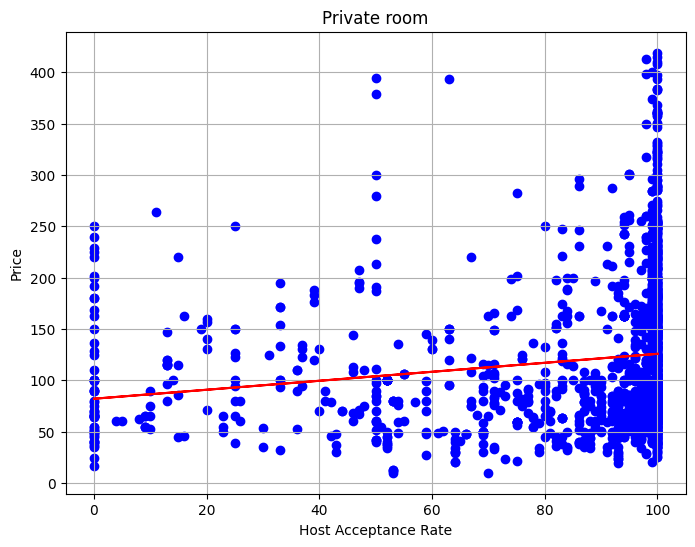

In [256]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_acceptance_rate']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_acceptance_rate']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_acceptance_rate']],
    model.predict(cd_private[['host_acceptance_rate']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [257]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_acceptance_rate']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['host_acceptance_rate'], cd_private['price'])[0, 1])


Pendiente: [0.43743628]
Intercepto: 82.03849929927937
y = 0.43743628287372965x + 82.03849929927937

Puntaje del modelo: 0.023132074698248406
Coeficiente de correlación: 0.15209232294316663


#### shared room

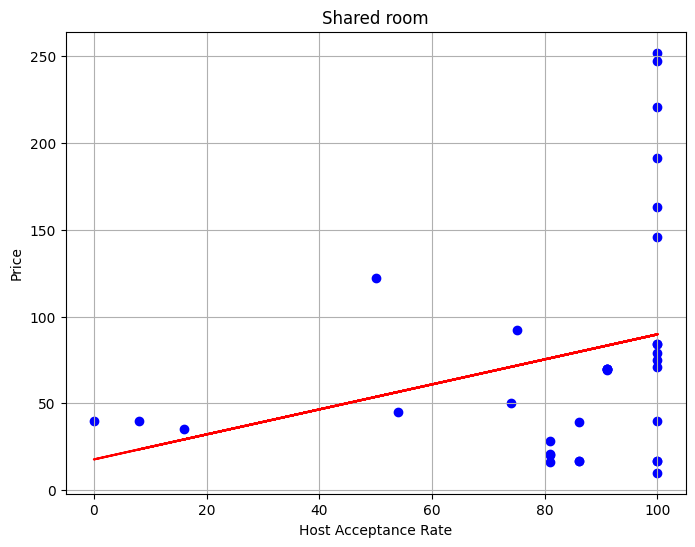

In [258]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_acceptance_rate']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_acceptance_rate']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_acceptance_rate']],
    model.predict(cd_shared[['host_acceptance_rate']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [259]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_acceptance_rate']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['host_acceptance_rate'], cd_shared['price'])[0, 1])

Pendiente: [0.72074055]
Intercepto: 17.656944032066534
y = 0.7207405482977036x + 17.656944032066534

Puntaje del modelo: 0.08308520183468315
Coeficiente de correlación: 0.2882450378318473


#### hotel room

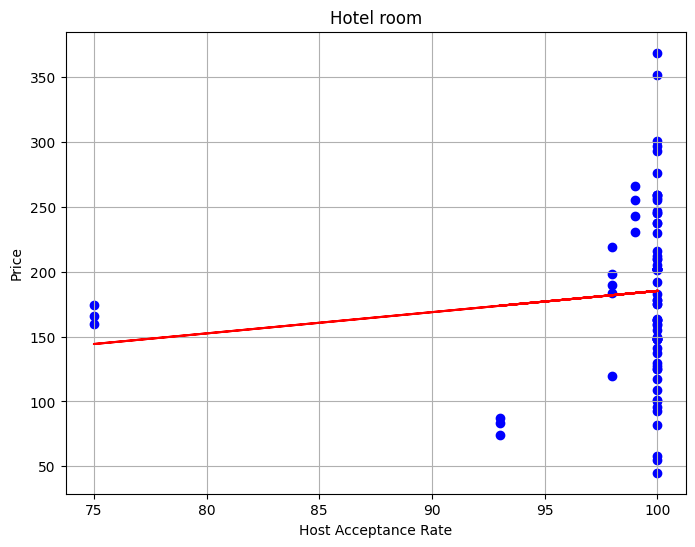

In [260]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_acceptance_rate']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_acceptance_rate']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_acceptance_rate']], 
    model.predict(cd_hotel[['host_acceptance_rate']]),
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [261]:
# 1) Obtener los parámetros de la regresión lineal en habitaciones privadas
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Mostrar la ecuación resultante del modelo
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el rendimiento del modelo mediante el coeficiente de determinación (R²)
print('Puntaje del modelo:', model.score(cd_hotel[['host_acceptance_rate']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['host_acceptance_rate'], cd_hotel['price'])[0, 1])

Pendiente: [1.6392733]
Intercepto: 21.33588064520336
y = 1.6392733000924316x + 21.33588064520336

Puntaje del modelo: 0.014556666471630342
Coeficiente de correlación: 0.12065101106758398


### x = host_is_superhost, y = price

#### Entire home/apt

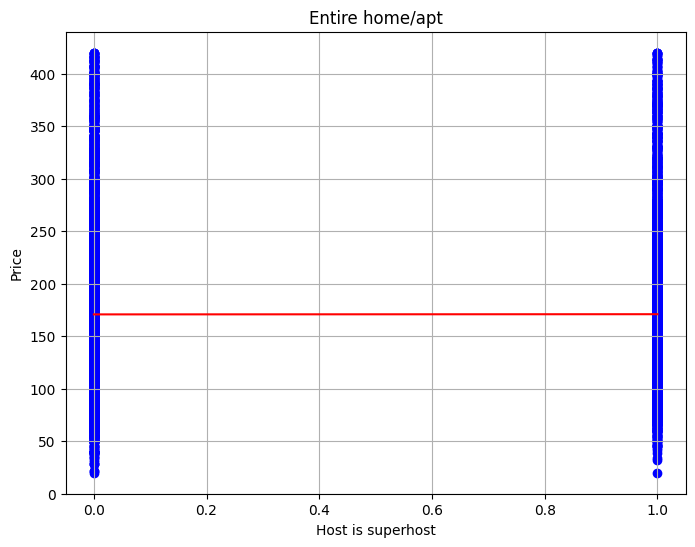

In [262]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['host_is_superhost']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_is_superhost']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['host_is_superhost']], 
    model.predict(cd_entire[['host_is_superhost']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [263]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['host_is_superhost']], cd_entire['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['host_is_superhost'], cd_entire['price'])[0, 1])

Pendiente: [0.17975191]
Intercepto: 170.79160837122538
y = 0.17975191182190775x + 170.79160837122538

Puntaje del modelo: 1.4051575117912662e-06
Coeficiente de correlación: 0.0011853933996065276


#### private room

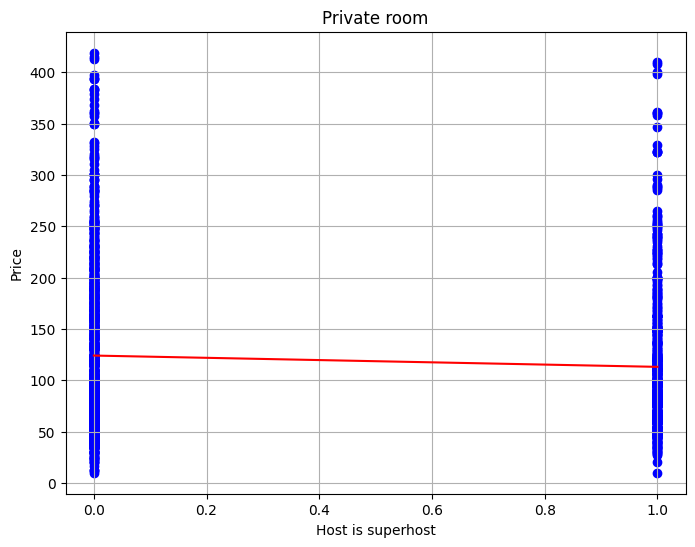

In [264]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_is_superhost']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_is_superhost']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_is_superhost']],
    model.predict(cd_private[['host_is_superhost']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [265]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_is_superhost']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['host_is_superhost'], cd_private['price'])[0, 1])

Pendiente: [-10.99455547]
Intercepto: 124.09349726775957
y = -10.994555468817772x + 124.09349726775957

Puntaje del modelo: 0.005392304029765427
Coeficiente de correlación: -0.07343230916814068


#### shared room

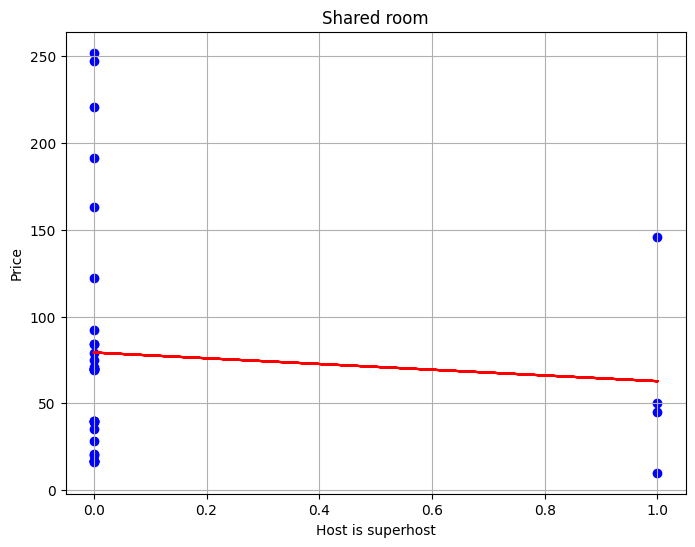

In [266]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_is_superhost']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_is_superhost']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_is_superhost']], 
    model.predict(cd_shared[['host_is_superhost']]), 
    color='red')
plt.title('Shared room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [267]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_is_superhost']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['host_is_superhost'], cd_shared['price'])[0, 1])

Pendiente: [-16.5]
y = -16.499999999999996x + 79.25

Puntaje del modelo: 0.006464449952627183
Coeficiente de correlación: -0.08040180316775968


#### hotel room

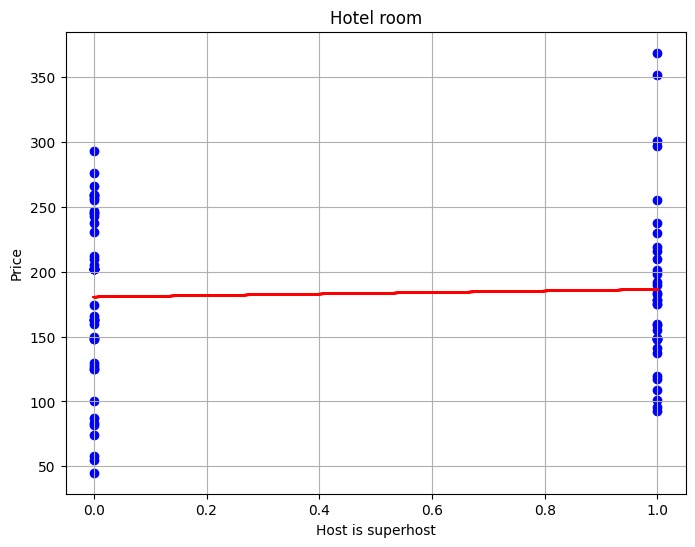

In [268]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_is_superhost']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_is_superhost']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_is_superhost']],
    model.predict(cd_hotel[['host_is_superhost']]), 
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [269]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['host_is_superhost']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['host_is_superhost'], cd_hotel['price'])[0, 1])

Pendiente: [5.82111801]
Intercepto: 180.52173913043478
y = 5.821118012422355x + 180.52173913043478

Puntaje del modelo: 0.0019236814704433058
Coeficiente de correlación: 0.043859793324219264


### x = bathrooms, y = accomodates

#### Entire home/apt

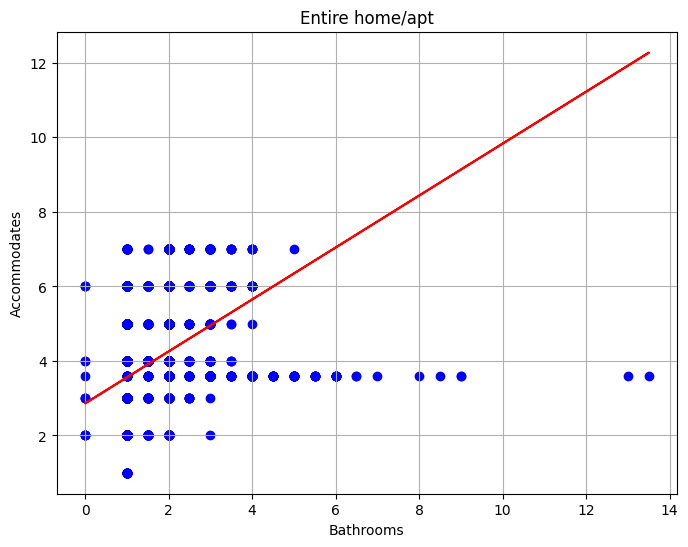

In [270]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['bathrooms']], cd_entire['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['bathrooms']], cd_entire['accommodates'], color='blue')
plt.plot(
    cd_entire[['bathrooms']],
    model.predict(cd_entire[['bathrooms']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [271]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['bathrooms']], cd_entire['accommodates']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['bathrooms'], cd_entire['accommodates'])[0, 1])

Pendiente: [0.69712209]
Intercepto: 2.859730427454926
y = 0.6971220917000263x + 2.859730427454926

Puntaje del modelo: 0.13136550092928556
Coeficiente de correlación: 0.36244379002723104


#### Private room

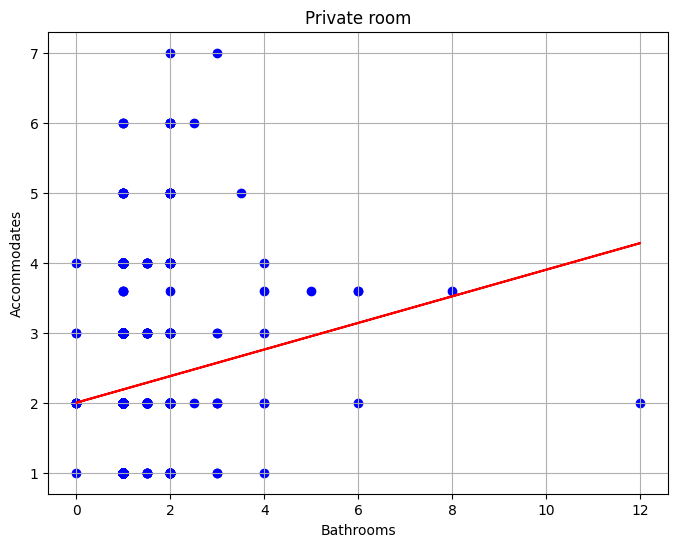

In [272]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['bathrooms']], cd_private['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['bathrooms']], cd_private['accommodates'], color='blue')
plt.plot(
    cd_private[['bathrooms']],
    model.predict(cd_private[['bathrooms']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [273]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['bathrooms']], cd_private['accommodates']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['bathrooms'], cd_private['accommodates'])[0, 1])

Pendiente: [0.18989799]
Intercepto: 2.0005613223275476
y = 0.18989799459691137x + 2.0005613223275476

Puntaje del modelo: 0.013570703675251039
Coeficiente de correlación: 0.11649336322405356


#### shared room

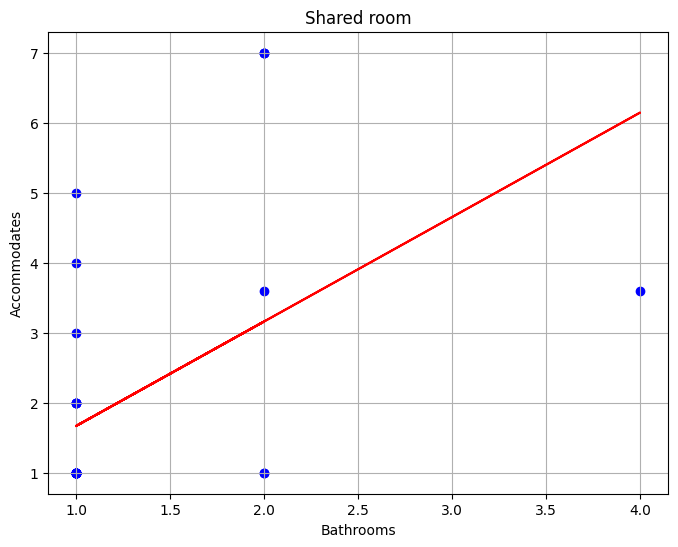

In [274]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['bathrooms']], cd_shared['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['bathrooms']], cd_shared['accommodates'], color='blue')
plt.plot(
    cd_shared[['bathrooms']], 
    model.predict(cd_shared[['bathrooms']]), 
    color='red'
)
plt.title('Shared room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [275]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['bathrooms']], cd_shared['accommodates']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['bathrooms'], cd_shared['accommodates'])[0, 1])

Pendiente: [1.49137529]
Intercepto: 0.17855477855477808
y = 1.491375291375292x + 0.17855477855477808

Puntaje del modelo: 0.24197916216662219
Coeficiente de correlación: 0.49191377513403955


#### hotel room

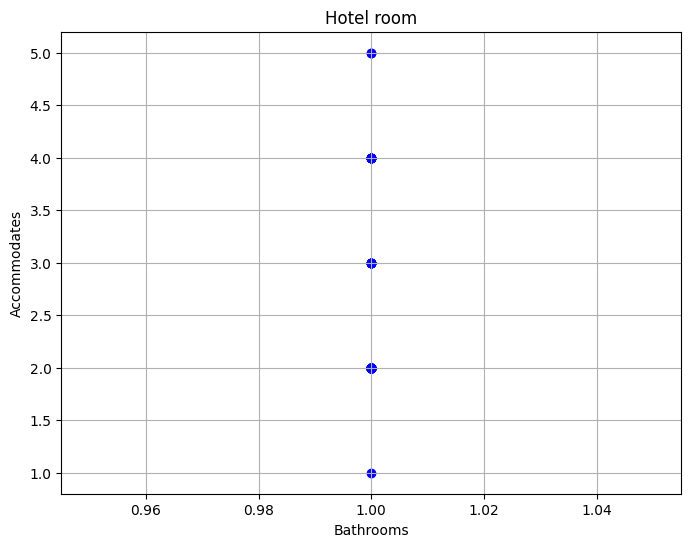

In [276]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['bathrooms']], cd_hotel['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['bathrooms']], cd_hotel['accommodates'], color='blue')
plt.plot(
    cd_hotel[['bathrooms']],
    model.predict(cd_hotel[['bathrooms']]),
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [277]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['bathrooms']], cd_hotel['accommodates']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['bathrooms'], cd_hotel['accommodates'])[0, 1])

Pendiente: [0.]
Intercepto: 2.3950617283950617
y = 0.0x + 2.3950617283950617

Puntaje del modelo: 0.0
Coeficiente de correlación: nan


/home/astro/Desktop/tmp/tmp-code/env/lib64/python3.13/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/astro/Desktop/tmp/tmp-code/env/lib64/python3.13/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### x = review_score_cleanliness, y = price

#### Entire home/apt

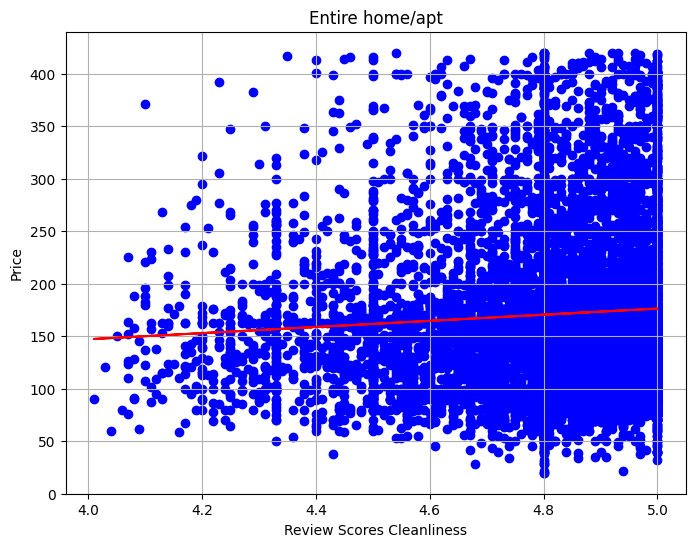

In [278]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['review_scores_cleanliness']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['review_scores_cleanliness']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['review_scores_cleanliness']], 
    model.predict(cd_entire[['review_scores_cleanliness']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [279]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['review_scores_cleanliness']], cd_entire['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['review_scores_cleanliness'], cd_entire['price'])[0, 1])

Pendiente: [29.24237351]
y = 29.242373508029978x + 30.130225690543057

Puntaje del modelo: 0.004959676048940653
Coeficiente de correlación: 0.0704249675111054


#### private room

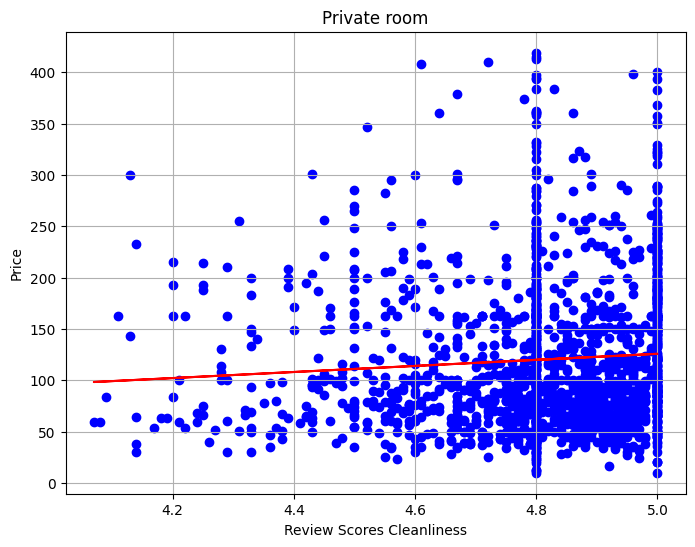

In [280]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['review_scores_cleanliness']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['review_scores_cleanliness']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['review_scores_cleanliness']],
    model.predict(cd_private[['review_scores_cleanliness']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [281]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['review_scores_cleanliness']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['review_scores_cleanliness'], cd_private['price'])[0, 1])

Pendiente: [29.56944757]
y = 29.569447567443014x + -22.022210081726058

Puntaje del modelo: 0.005321538552323868
Coeficiente de correlación: 0.07294887629239981


#### shared room

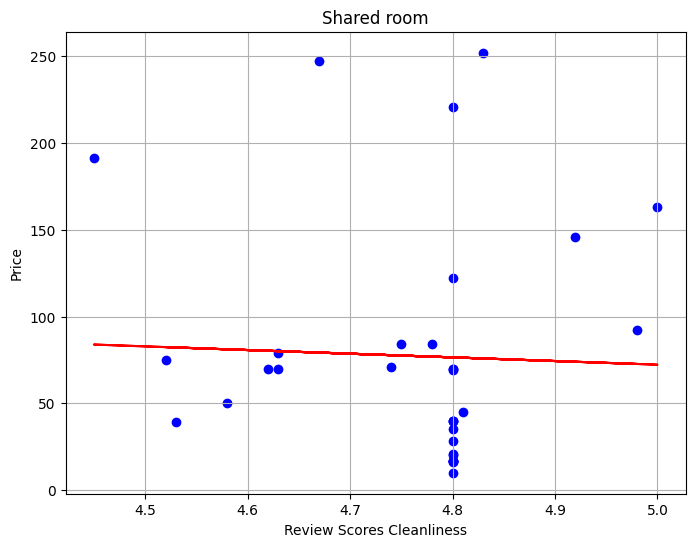

In [282]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['review_scores_cleanliness']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['review_scores_cleanliness']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['review_scores_cleanliness']],
    model.predict(cd_shared[['review_scores_cleanliness']]), 
    color='red'
)
plt.title('Shared room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [283]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['review_scores_cleanliness']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['review_scores_cleanliness'], cd_shared['price'])[0, 1])

Pendiente: [-21.11040068]
y = -21.11040068201169x + 177.79433077578744

Puntaje del modelo: 0.0014067350758651953
Coeficiente de correlación: -0.03750646712055437


#### hotel room

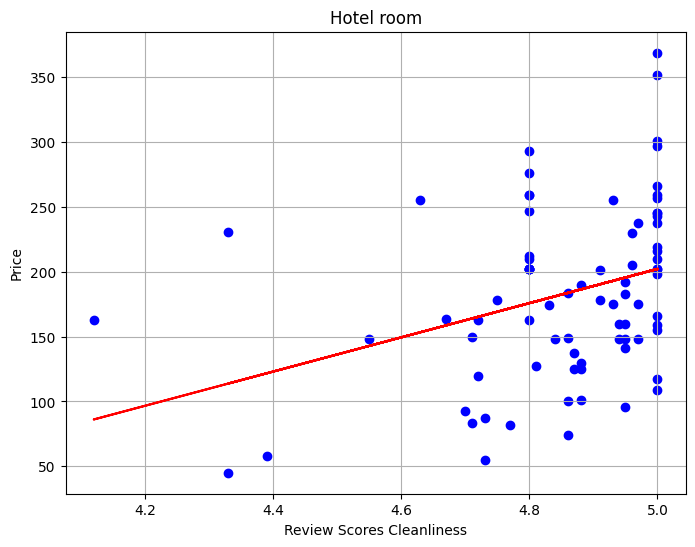

In [284]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['review_scores_cleanliness']], 
    model.predict(cd_hotel[['review_scores_cleanliness']]), 
    color='red')
plt.title('Hotel room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [285]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['review_scores_cleanliness']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['review_scores_cleanliness'], cd_hotel['price'])[0, 1])

Pendiente: [131.94882047]
Intercepto: -457.53376138184353
y = 131.948820466214x + -457.53376138184353

Puntaje del modelo: 0.11402441417579212
Coeficiente de correlación: 0.3376750126612745


### x = host_idendity_verified, y = price

#### Entire home/apt

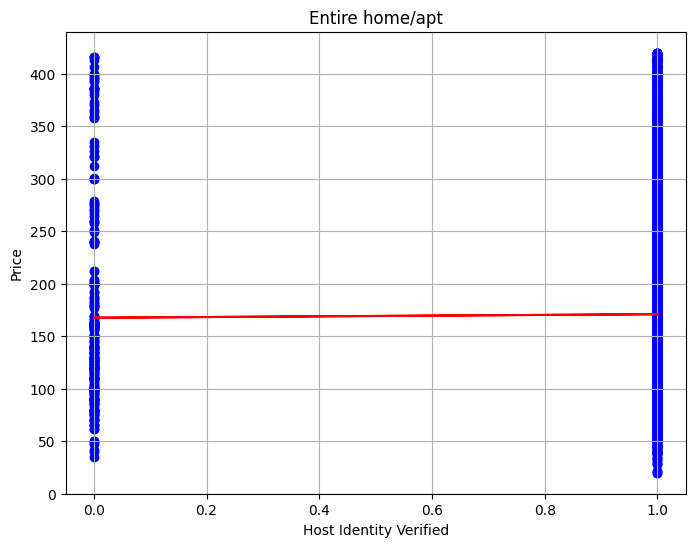

In [286]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['host_identity_verified']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_identity_verified']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['host_identity_verified']], 
    model.predict(cd_entire[['host_identity_verified']]),
    color='red')
plt.title('Entire home/apt')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [287]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['host_identity_verified']], cd_entire['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['host_identity_verified'], cd_entire['price'])[0, 1])

Pendiente: [3.37292715]
Intercepto: 167.59619686800897
y = 3.3729271504042546x + 167.59619686800897

Puntaje del modelo: 5.7346172444017185e-05
Coeficiente de correlación: 0.007572725562449243


#### private room

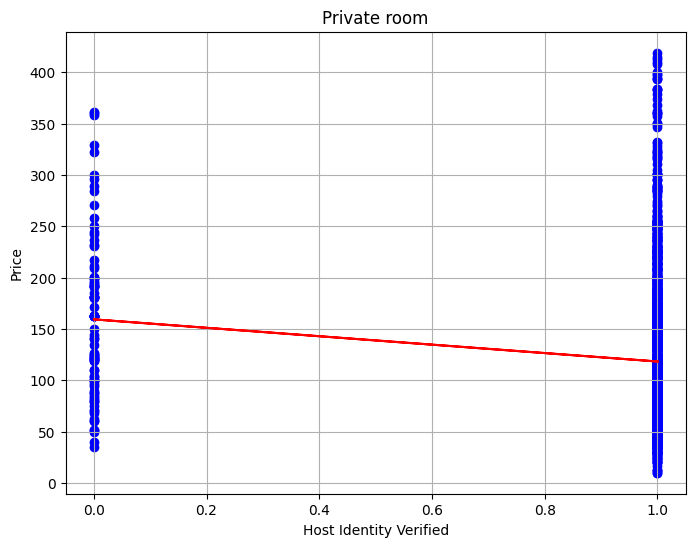

In [288]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_identity_verified']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_identity_verified']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_identity_verified']],
    model.predict(cd_private[['host_identity_verified']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [289]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_identity_verified']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['host_identity_verified'], cd_private['price'])[0, 1])

Pendiente: [-41.02022967]
Intercepto: 159.32971014492753
y = -41.02022967469621x + 159.32971014492753

Puntaje del modelo: 0.01579506853395174
Coeficiente de correlación: -0.125678433050193


#### shared room

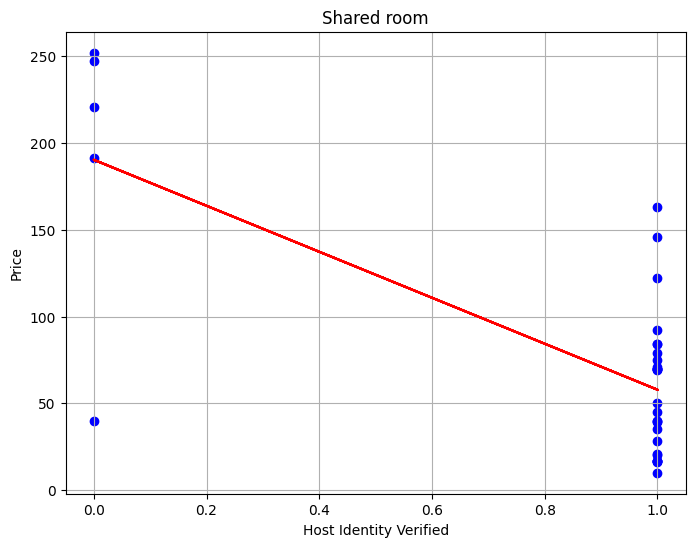

In [290]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_identity_verified']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_identity_verified']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_identity_verified']],
    model.predict(cd_shared[['host_identity_verified']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [291]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_identity_verified']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['host_identity_verified'], cd_shared['price'])[0, 1])

Pendiente: [-132.47241379]
Intercepto: 190.3
y = -132.47241379310347x + 190.3

Puntaje del modelo: 0.5035021677712399
Coeficiente de correlación: -0.7095788664914141


#### hotel room

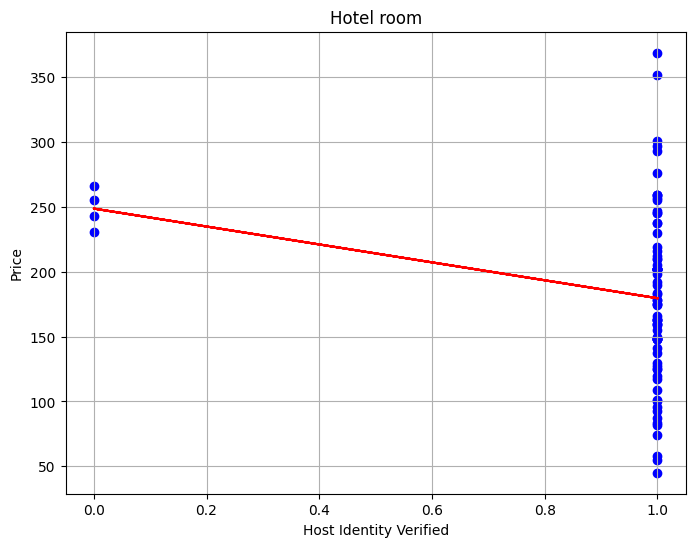

In [292]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_identity_verified']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_identity_verified']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_identity_verified']],
    model.predict(cd_hotel[['host_identity_verified']]),
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [293]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['host_identity_verified']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['host_identity_verified'], cd_hotel['price'])[0, 1])

Pendiente: [-69.12662338]
Intercepto: 248.74999999999997
y = -69.12662337662334x + 248.74999999999997

Puntaje del modelo: 0.05189623855919134
Coeficiente de correlación: -0.22780745940199426


### x = instant_bookable, y = price

#### Entire home/apt

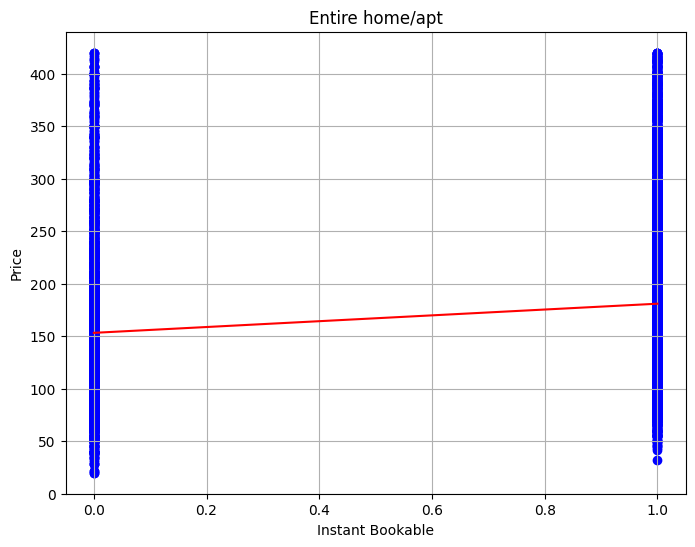

In [294]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['instant_bookable']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['instant_bookable']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['instant_bookable']],
    model.predict(cd_entire[['instant_bookable']]),
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [295]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['instant_bookable']], cd_entire['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_entire['instant_bookable'], cd_entire['price'])[0, 1])

Pendiente: [27.75941316]
Intercepto: 153.2146764148389
y = 27.759413155903438x + 153.2146764148389

Puntaje del modelo: 0.03154189226715165
Coeficiente de correlación: 0.17760037237333914


#### private room

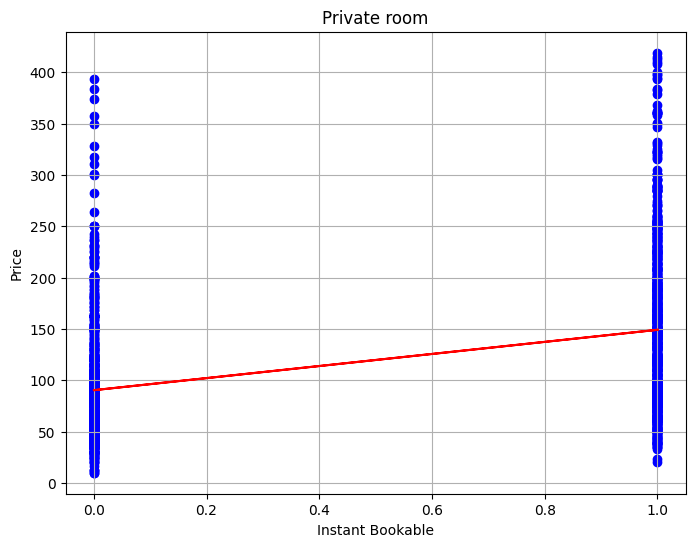

In [296]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['instant_bookable']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['instant_bookable']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['instant_bookable']],
    model.predict(cd_private[['instant_bookable']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [297]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['instant_bookable']], cd_private['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_private['instant_bookable'], cd_private['price'])[0, 1])

Pendiente: [58.79143888]
Intercepto: 90.3816611539875
y = 58.7914388813607x + 90.3816611539875

Puntaje del modelo: 0.17157965875824588
Coeficiente de correlación: 0.41422175070636436


#### shared room

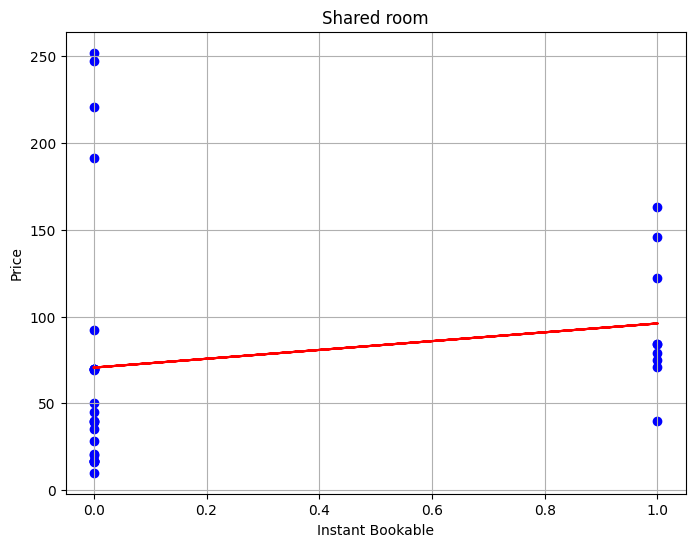

In [298]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['instant_bookable']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['instant_bookable']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['instant_bookable']],
    model.predict(cd_shared[['instant_bookable']]),
    color='red'
)
plt.title('Shared room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [299]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['instant_bookable']], cd_shared['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_shared['instant_bookable'], cd_shared['price'])[0, 1])

Pendiente: [25.42]
Intercepto: 70.58
y = 25.420000000000016x + 70.58

Puntaje del modelo: 0.028768422853779452
Coeficiente de correlación: 0.16961256690994211


#### hotel room

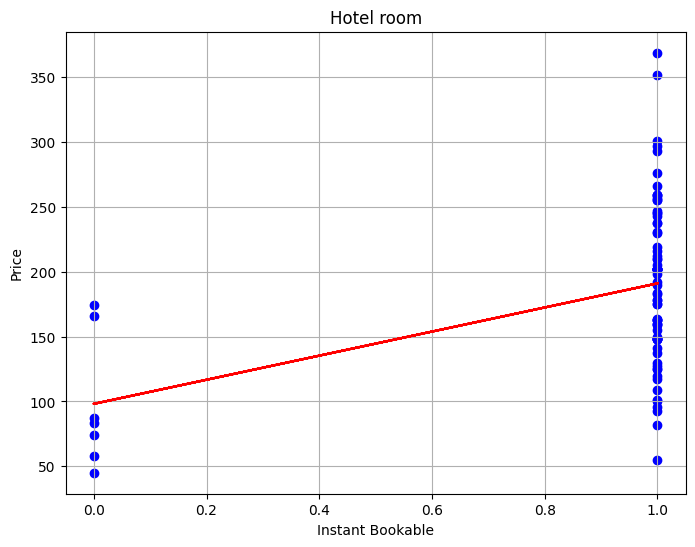

In [300]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['instant_bookable']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['instant_bookable']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['instant_bookable']],
    model.predict(cd_hotel[['instant_bookable']]), 
    color='red'
)
plt.title('Hotel room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [301]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['instant_bookable']], cd_hotel['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', np.corrcoef(cd_hotel['instant_bookable'], cd_hotel['price'])[0, 1])

Pendiente: [92.92471042]
Intercepto: 98.14285714285717
y = 92.92471042471041x + 98.14285714285717

Puntaje del modelo: 0.15771996443624126
Coeficiente de correlación: 0.3971397291083342


### x = property_type, y = price

#### Entire home/apt

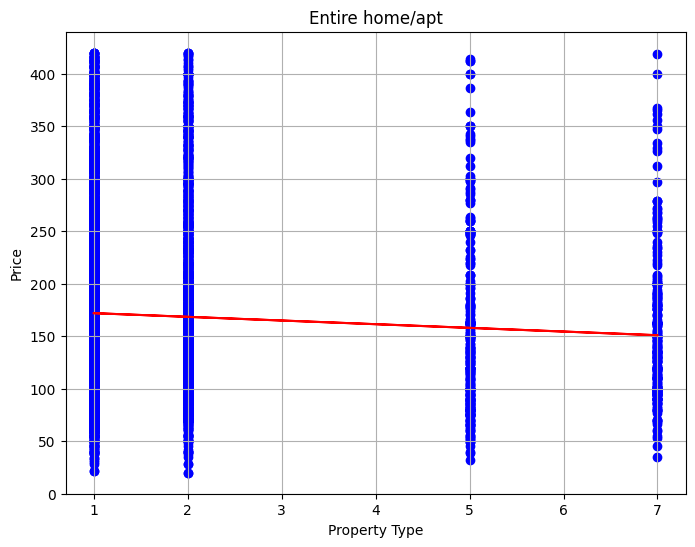

In [302]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_entire
#    - Se utiliza pd.to_numeric(..., errors='coerce') para convertir a numérico
#      y, si no es posible, se asigna NaN (valores no interpretables).
#    - Después, con .notnull() se conservan únicamente los valores válidos.
# ---------------------------------------------------------------------------------
cd_entire_num = cd_entire[pd.to_numeric(cd_entire['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire_num[['property_type']], cd_entire_num['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire_num[['property_type']], cd_entire_num['price'], color='blue')
plt.plot(
    cd_entire_num[['property_type']],
    model.predict(cd_entire_num[['property_type']]), 
    color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [303]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire_num[['property_type']], cd_entire_num['price']))

# 4) Calcular el coeficiente de correlación entre las variables
#print('Coeficiente de correlación:', np.corrcoef(cd_entire['property_type'], cd_entire['price'])[0, 1])
print('Coeficiente de correlación:', -1*np.sqrt(model.score(cd_entire_num[['property_type']], cd_entire_num['price'])))

Pendiente: [-3.50322148]
Intercepto: 175.46915026259222
y = -3.503221479673958x + 175.46915026259222

Puntaje del modelo: 0.0031870459027758535
Coeficiente de correlación: -0.05645392725732953


#### private room

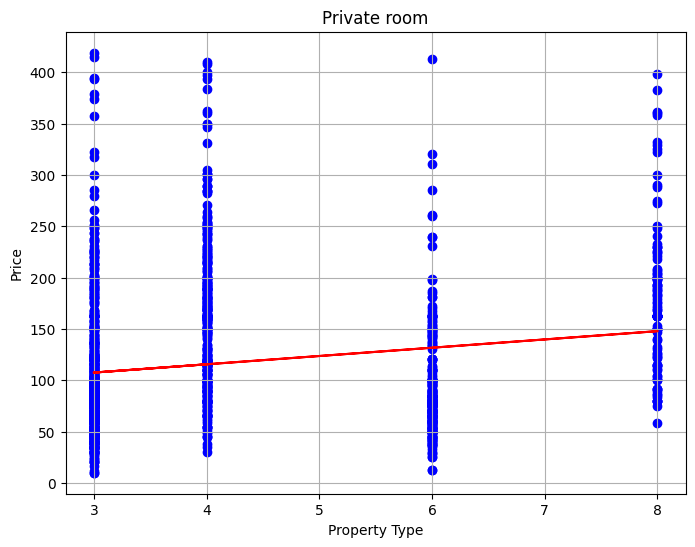

In [304]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_private
#    - Convertimos la columna a tipo numérico con pd.to_numeric(), asignando NaN
#      a valores que no se puedan convertir (errors='coerce').
#    - Mantenemos únicamente los valores no nulos (notnull()).
# ---------------------------------------------------------------------------------
cd_private_num = cd_private[pd.to_numeric(cd_private['property_type'], errors='coerce').notnull()]

# 2) Crear y ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private_num[['property_type']], cd_private_num['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private_num[['property_type']], cd_private_num['price'], color='blue')
plt.plot(
    cd_private_num[['property_type']],
    model.predict(cd_private_num[['property_type']]),
    color='red'
)
plt.title('Private room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [305]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private_num[['property_type']], cd_private_num['price']))

# 4) Calcular el coeficiente de correlación entre las variables
print('Coeficiente de correlación:', -1*np.sqrt(model.score(cd_private_num[['property_type']], cd_private_num['price'])))

Pendiente: [8.06975924]
Intercepto: 83.30787043936915
y = 8.069759239763805x + 83.30787043936915

Puntaje del modelo: 0.032855606525904135
Coeficiente de correlación: -0.18126115559022604


#### shared room

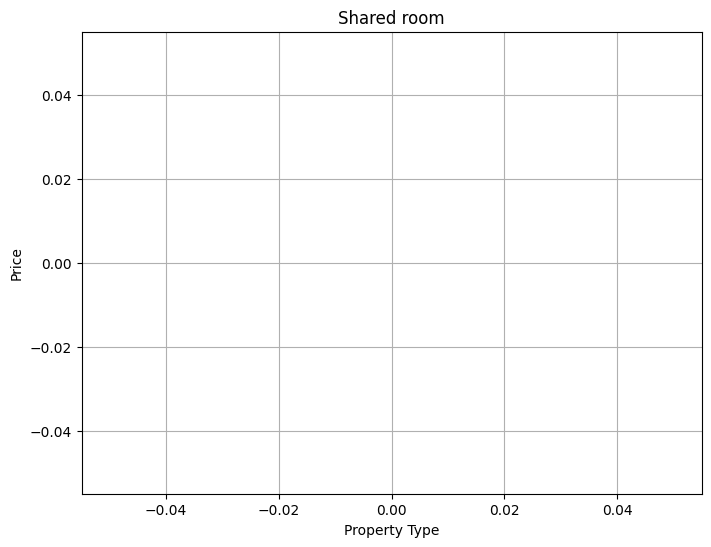

In [306]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_shared
#    - Convertimos la columna a tipo numérico con pd.to_numeric(), asignando NaN a
#      valores no convertibles. Posteriormente, descartamos las filas con NaN.
# ---------------------------------------------------------------------------------
cd_shared_aux = cd_shared[pd.to_numeric(cd_shared['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
# model.fit(cd_shared[['property_type']], cd_shared['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared_aux[['property_type']], cd_shared_aux['price'])
# plt.plot(cd_shared[['property_type']], model.predict(cd_shared[['property_type']]), color='red')

plt.title('Shared room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------------
# Observación:
# Al final, se concluye que ninguna de las habitaciones compartidas posee un
# "property_type" entre los 6 valores más comunes (tal como se codificaron).
# Por ello, no fue posible ajustar ni visualizar la línea de regresión.
# ---------------------------------------------------------------------------------


In [307]:
# # 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
# m = model.coef_
# b = model.intercept_
# print('Pendiente:', m)
# print('Intercepto:', b)

# # 2) Representar el modelo lineal de forma explícita
# print(f'y = {m[0]}x + {b}', end='\n\n')

# # 3) Evaluar el modelo con un indicador de desempeño
# print('Puntaje del modelo:', model.score(cd_shared_aux[['property_type']], cd_shared_aux['price']))

#### hotel room

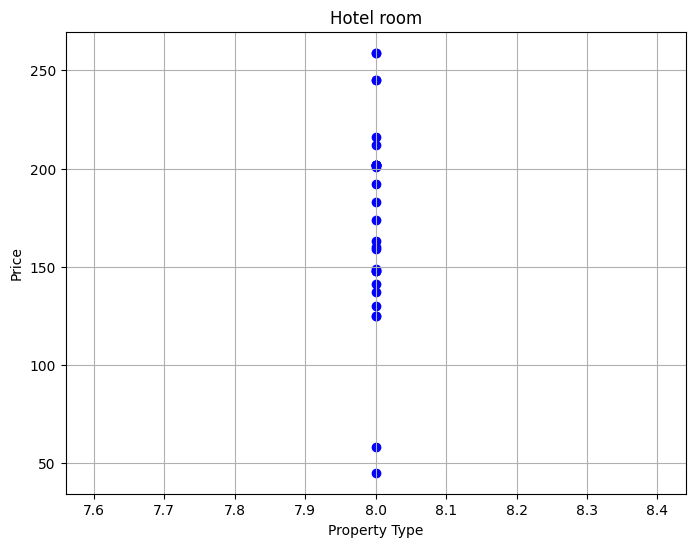

In [308]:
# 1) Filtrar valores no numéricos en la columna "property_type"
cd_hotel_aux = cd_hotel[pd.to_numeric(cd_hotel['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
#model.fit(cd_hotel[['property_type']], cd_hotel['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel_aux[['property_type']], cd_hotel_aux['price'], color='blue')
#plt.plot(cd_hotel[['property_type']], model.predict(cd_hotel[['property_type']]), color='red')
plt.title('Hotel room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()
# ---------------------------------------------------------------------------------
# Observación:
# Al final, se concluye que ninguna de las habitaciones compartidas posee un
# "property_type" entre los 6 valores más comunes (tal como se codificaron).
# Por ello, no fue posible ajustar ni visualizar la línea de regresión.
# ---------------------------------------------------------------------------------

In [309]:
# # 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
# m = model.coef_
# b = model.intercept_
# print('Pendiente:', m)
# print('Intercepto:', b)

# # 2) Representar el modelo lineal de forma explícita
# print(f'y = {m[0]}x + {b}', end='\n\n')

# # 3) Evaluar el modelo con un indicador de desempeño
# print('Puntaje del modelo:', model.score(cd_shared_aux[['property_type']], cd_shared_aux['price']))

### Mapas de Calor

#### Entire home/apt

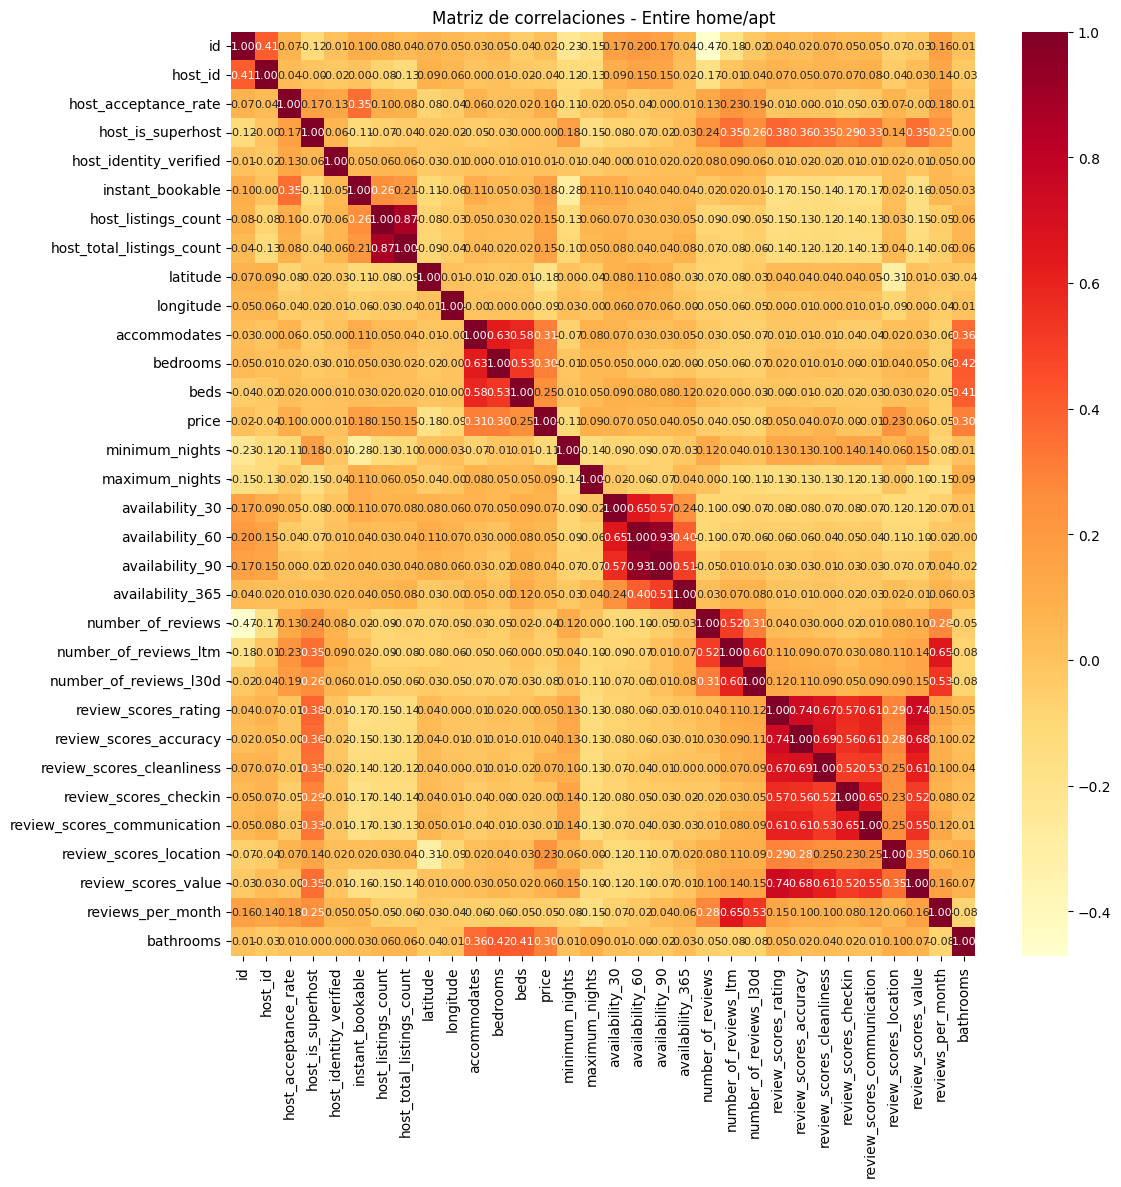

In [311]:
# ---------------------------------------------------------------------------------
# 1) Análisis de correlaciones para tipos específicos de alojamiento
#    - Creamos matrices de correlación separadas por tipo de propiedad
#    - Visualizamos las relaciones entre variables numéricas usando heatmaps
#    - Aplicamos formato especial para mejor legibilidad de los resultados
# ---------------------------------------------------------------------------------

# Para propiedades completas (Entire home/apt)
matriz = cd_entire.select_dtypes(include=[np.number])  # Seleccionamos solo columnas numéricas
correlaciones = matriz.corr()                          # Calculamos la matriz de correlación

plt.figure(figsize=(12, 12))                           # Configuramos tamaño de figura
sns.heatmap(correlaciones,                             # Creamos heatmap con valores anotados
            annot=True,                                # Muestra valores numéricos
            cmap='YlOrRd',                             # Usa escala de colores amarillo-rojo oscuro
            annot_kws={"size": 8},                     # Define tamaño de fuente para anotaciones
            fmt='.2f')                                 # Formatea números a 2 decimales

plt.title('Matriz de correlaciones - Entire home/apt')
plt.show()

#### Private room

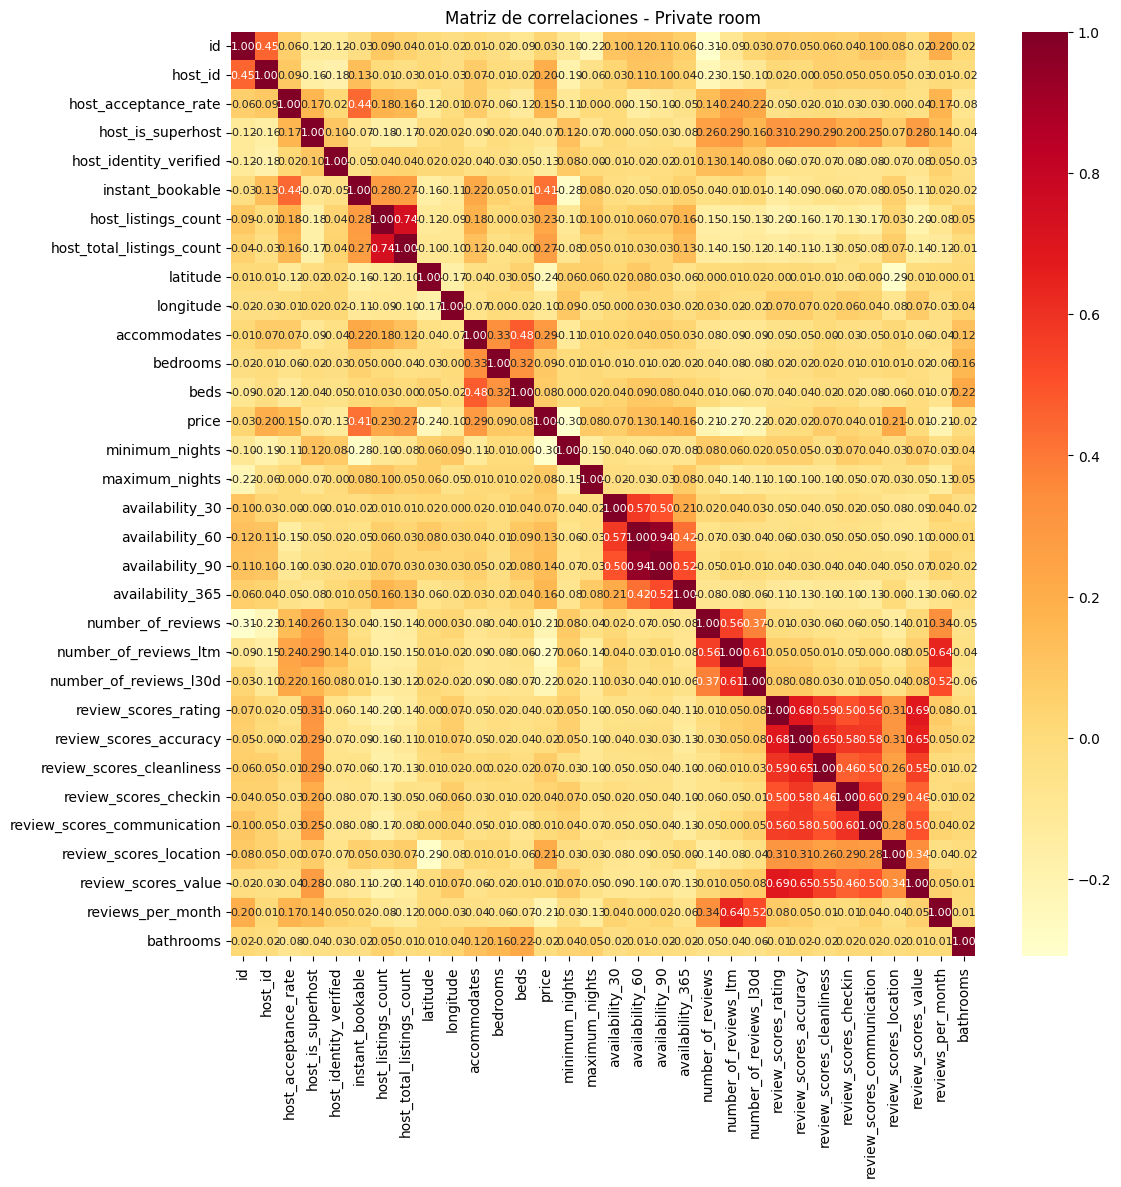

In [312]:
# Para habitaciones privadas (Private room)
matriz = cd_private.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(
    correlaciones,
    annot=True,
    cmap='YlOrRd',
    annot_kws={"size": 8},
    fmt='.2f'
)
plt.title('Matriz de correlaciones - Private room')
plt.show()

#### Shared room

In [313]:
print(cd_shared.columns)


Index(['id', 'host_id', 'source', 'name', 'description',
       'neighborhood_overview', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'bathrooms_text', 'amenities', 'has_availability',
       'first_review', 'last_review', 'instant_bookable',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',

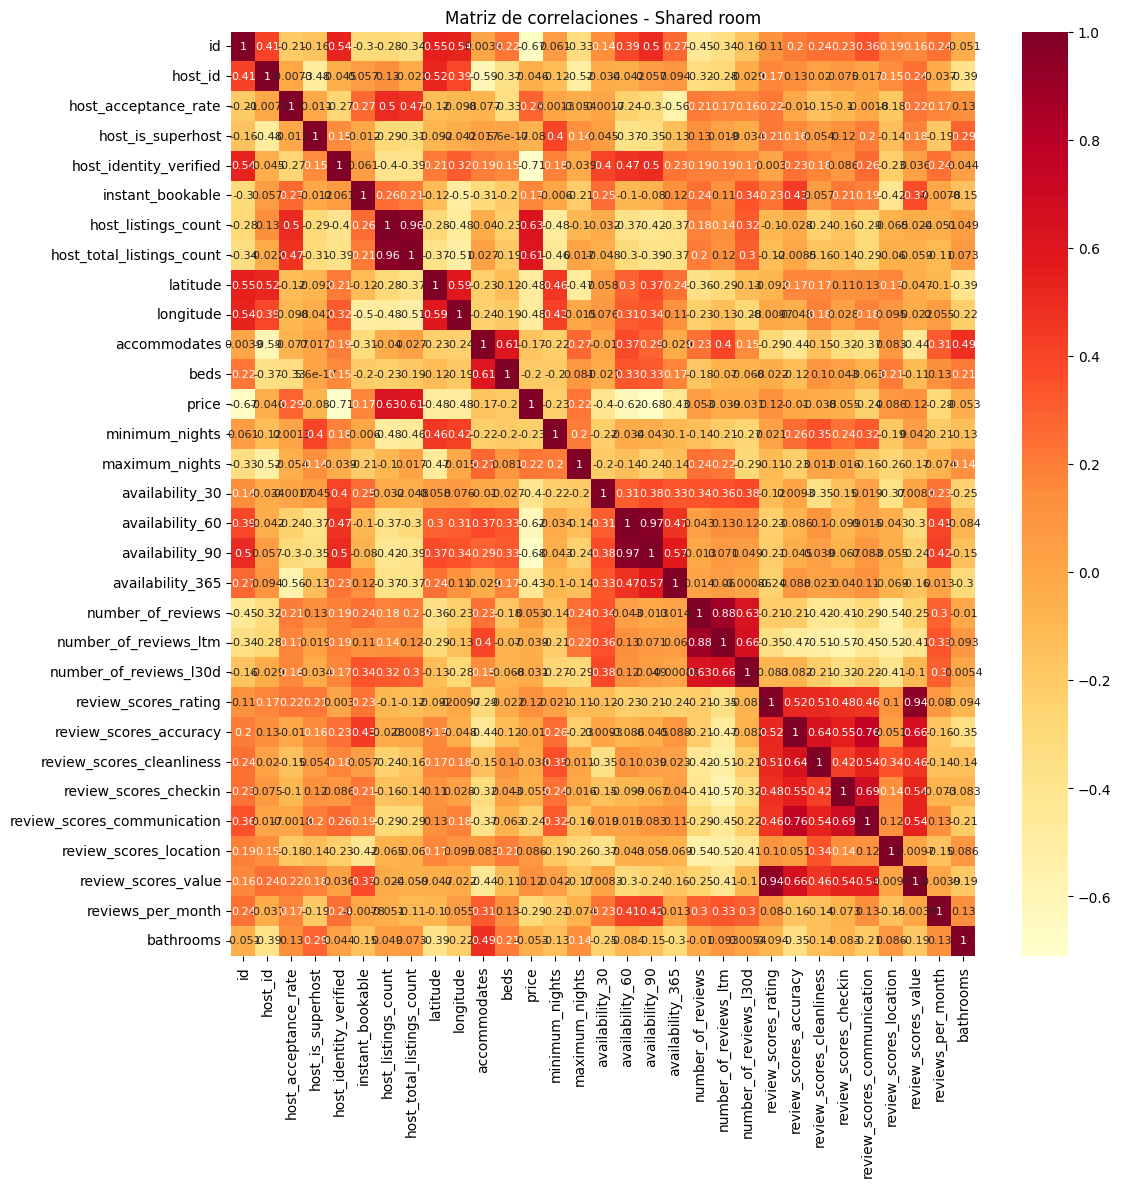

In [314]:
# Para habitaciones compartidas (Shared room)

# Revisar si 'bedrooms' tiene un solo valor
# if cd_shared['bedrooms'].nunique() == 1:
#     print("La variable 'bedrooms' tiene un solo valor y será eliminada del heatmap.")
cd_shared = cd_shared.drop(columns=['bedrooms'])

# Calcular correlaciones sin 'bedrooms'
matriz = cd_shared.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

# Graficar heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(
    correlaciones, 
    annot=True, 
    cmap='YlOrRd', 
    annot_kws={"size": 8}, 
    fmt='.2g'
)
plt.title('Matriz de correlaciones - Shared room')
plt.show()


#### Hotel Room

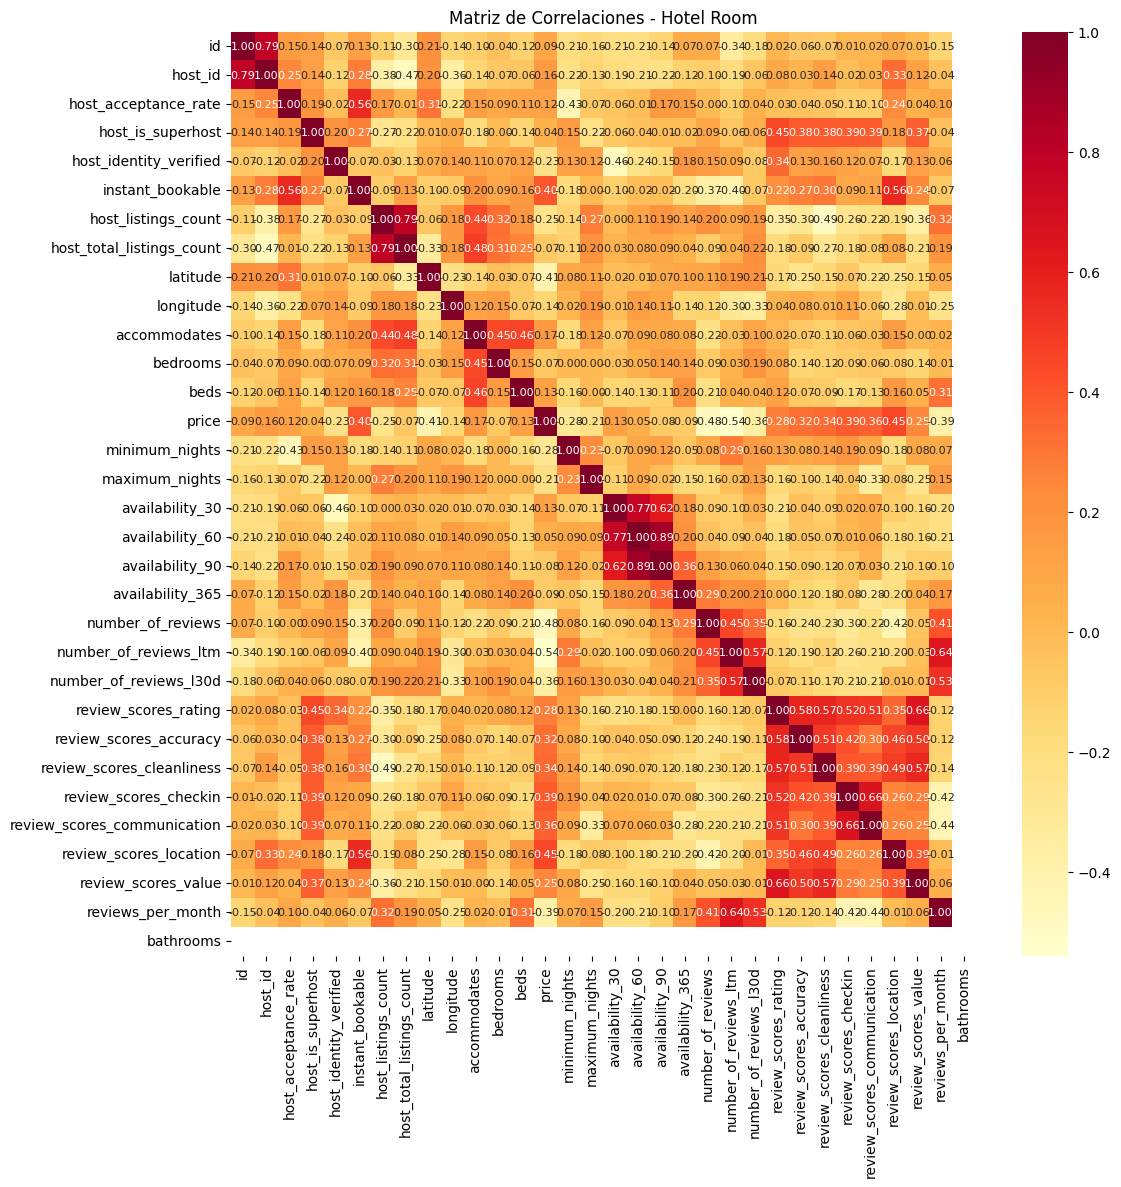

In [315]:
# Para cuartos de hotel (Hotel room)
matriz = cd_hotel.select_dtypes(include=[np.number])  # Seleccionamos solo columnas numéricas
correlaciones = matriz.corr()                          # Calculamos la matriz de correlación

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones,
            annot=True,
            cmap='YlOrRd',
            annot_kws={"size": 8},
            fmt='.2f')

plt.title('Matriz de Correlaciones - Hotel Room')  # Agregamos título descriptivo
plt.show()